In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cab_data = pd.read_csv('/content/Cab_Data.csv')
city = pd.read_csv('/content/City.csv')
customer_id = pd.read_csv('/content/Customer_ID.csv')
transaction_id = pd.read_csv('/content/Transaction_ID.csv')

In [ ]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city.shape

(20, 3)

In [ ]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
km_city = cab_data.groupby('City')['KM Travelled']

In [ ]:
km_city = km_city.sum().reset_index()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

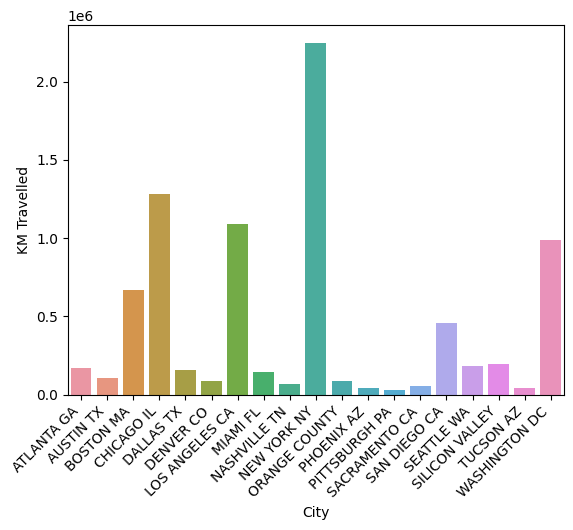

In [ ]:
ax = sns.barplot(x='City',y='KM Travelled',data=km_city)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


As we can see most of the travellers are from the newyork and then chicago with washington dc and los angeles these are the big cities in the US and it will be very beneficial for the companies if they on these cities first because of their chances of getting the customers will be very high.

In [ ]:
top_cities = cab_data.groupby('City')['KM Travelled'].sum().nlargest(3)
top_cities_df = cab_data.loc[cab_data['City'].isin(top_cities.index)]


In [ ]:
market_share = top_cities_df['Company'].value_counts().reset_index()

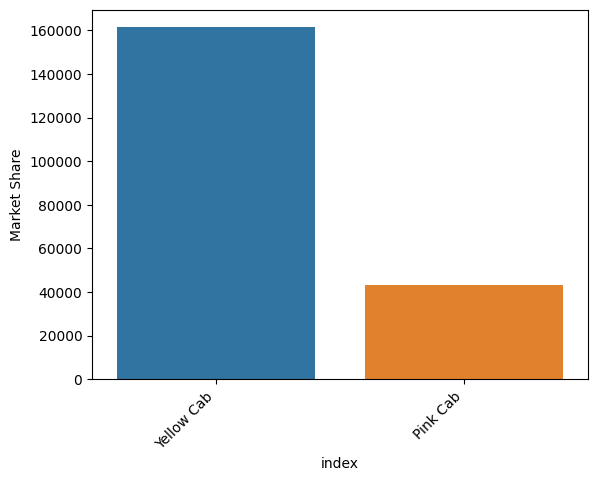

In [ ]:
sns.barplot(x='index', y='Company', data=market_share)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Market Share')
plt.show()

If we concentrate on the top 3 market , we can see that most of the market is captured by the yellow cab rather that the pink cab.

Merging the dataframes on the common columns which is the transaction id

In [ ]:
merged_city = pd.merge(cab_data,transaction_id,on='Transaction ID')

In [ ]:
merged_city.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [ ]:
merged_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Customer ID     359392 non-null  int64  
 8   Payment_Mode    359392 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


In [ ]:
cab_data.isnull().sum()


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

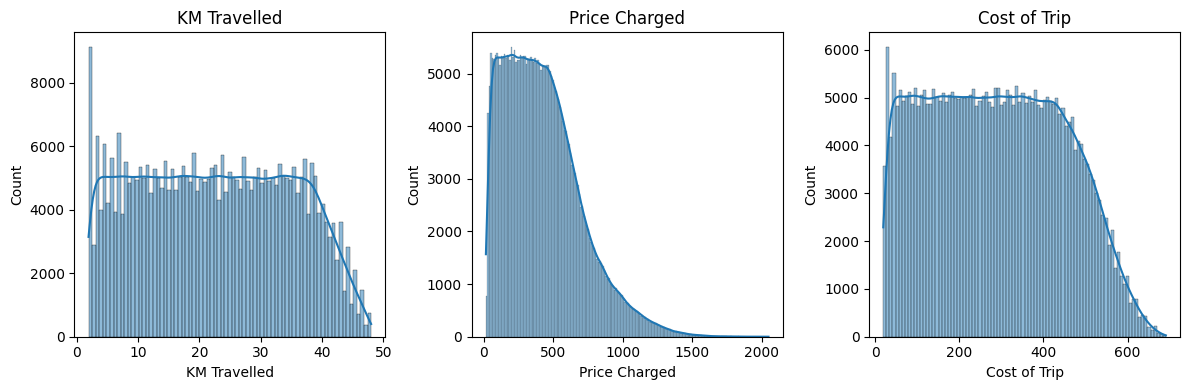

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip']
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 4))

for i, col in enumerate(num_cols):
    sns.histplot(cab_data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()


* As we can see most of the travelled cities are between the range of o to 40 kms meaning most of people travelled within these distances. 

* We can see there is  change in the price or sudden decrease in the prices after 1000.

* The cost of the trip is much higher for the shorter distance and keeps on increasing at the costant pace within 0 to 450.

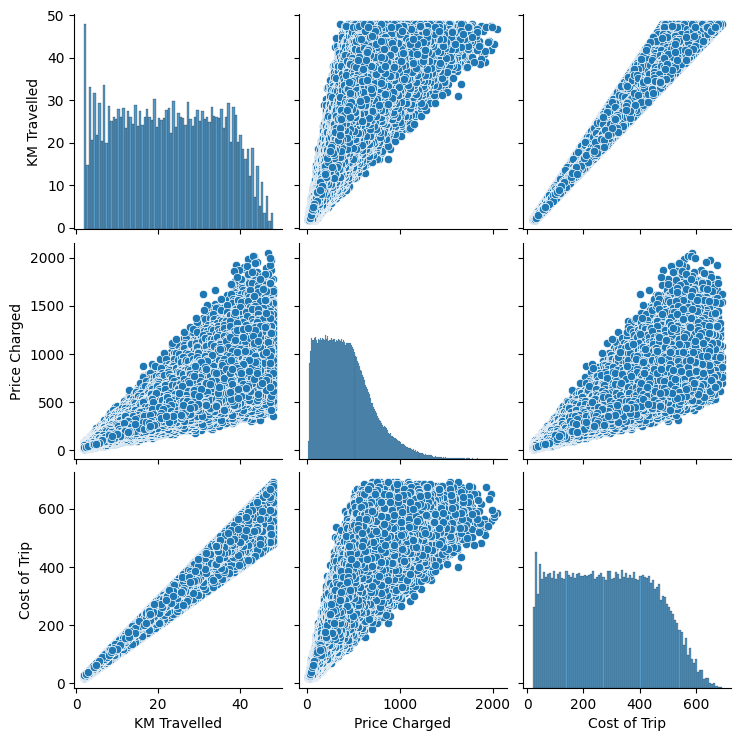

In [ ]:
sns.pairplot(cab_data[num_cols])
plt.show()


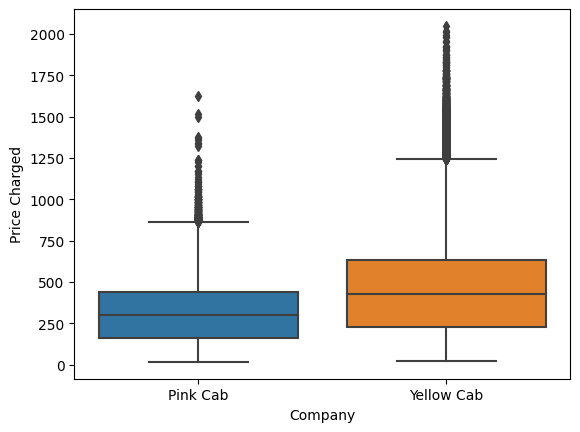

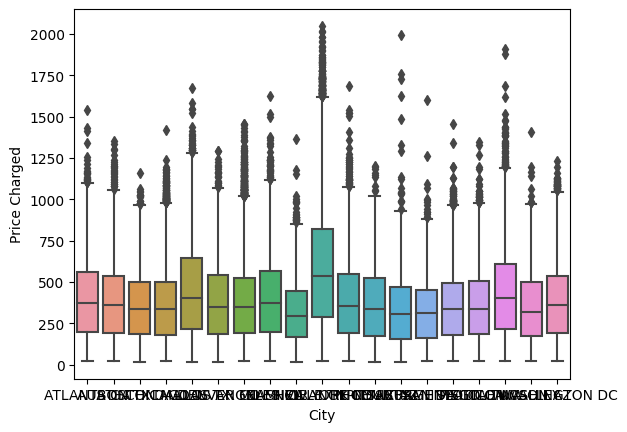

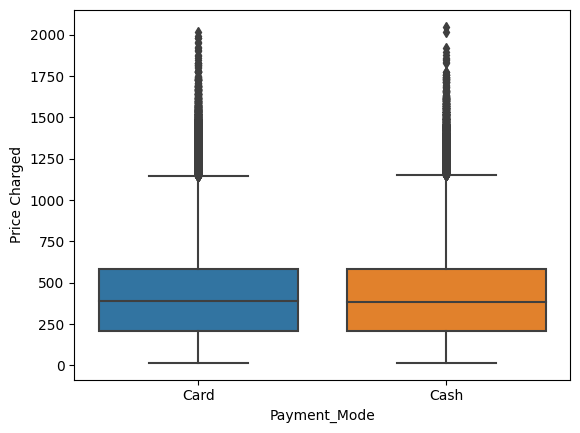

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# identify categorical columns
cat_cols = ['Company', 'City', 'Payment_Mode']

# plot boxplots for each categorical column against 'Price Charged'
for col in cat_cols:
    sns.boxplot(x=col, y='Price Charged', data=merged_city)
    plt.show()


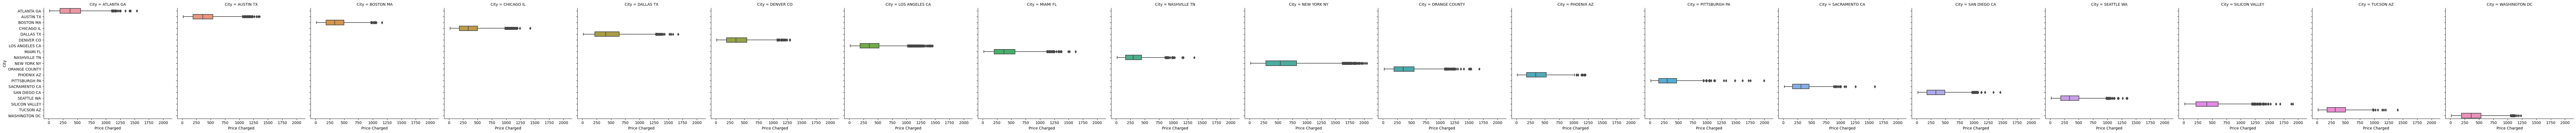

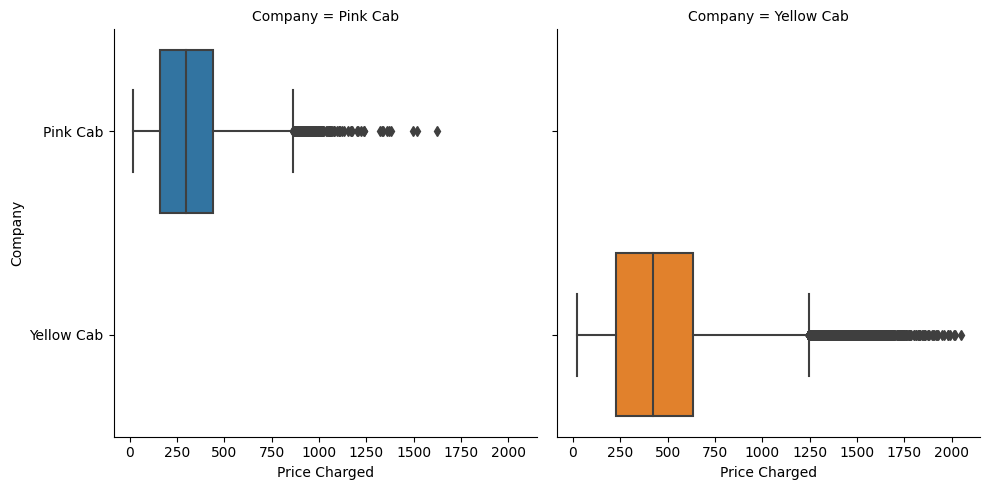

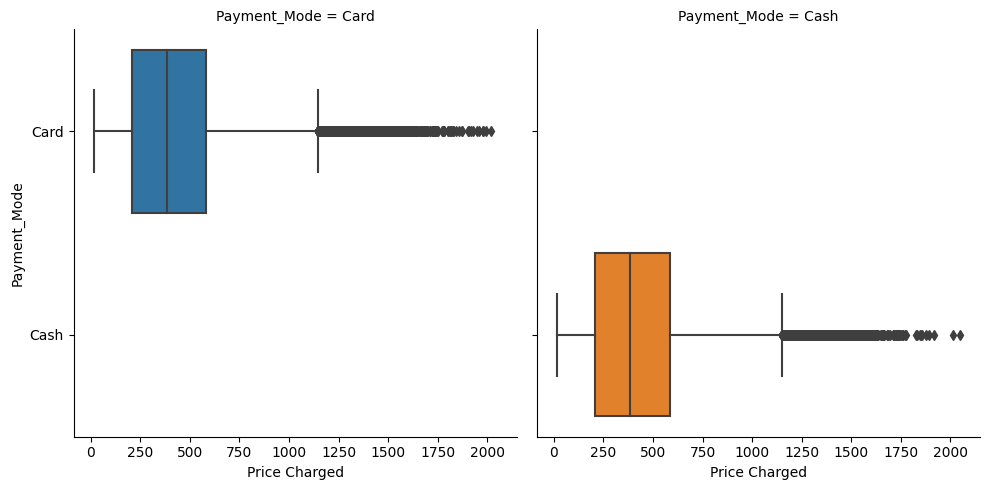

In [ ]:
cat_cols = ['Company', 'City', 'Payment_Mode']

# plot boxplots for each categorical column against 'Price Charged' side by side
sns.catplot(x='Price Charged', y='City', kind='box', data=merged_city, col='City')
sns.catplot(x='Price Charged', y='Company', kind='box', data=merged_city, col='Company')
sns.catplot(x='Price Charged', y='Payment_Mode', kind='box', data=merged_city, col='Payment_Mode')
plt.show()
